In [49]:
"""Importación de librerías esenciales para SVM"""
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [24]:
"""Importación del Dataset"""
df = pd.read_csv('StudentsPerformance.csv', encoding = 'utf-8')

In [25]:
"""Cambio de los nombres de las columnas"""
df.columns = ['gender', 'race', 'education', 'lunch', 'preparation', 'math_score', 'reading_score', 'writing_score']

"""Creación de la función
    math_passed, para la calificación de matemáticas """

df['math_passed'] = df['math_score'].apply(lambda x: 1 if x >= 70 else 0)
df.head()

,gender,race,education,lunch,preparation,math_score,reading_score,writing_score,math_passed
0,female,group B,bachelor's degree,standard,none,72,72,74,1
1,female,group C,some college,standard,completed,69,90,88,0
2,female,group B,master's degree,standard,none,90,95,93,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,0
4,male,group C,some college,standard,none,76,78,75,1


In [29]:
"""Preparacion de los datos para el modelo"""
df = pd.read_csv('StudentsPerformance.csv', encoding = 'utf-8')
df.columns = ['gender', 'race', 'education', 'lunch', 'preparation', 'math_score', 'reading_score', 'writing_score']

"""Declaracion de las condiciones para el puntaje de aprobacion"""

df['writing_passed'] = df['writing_score'].apply(lambda x: 1 if x >= 70 else 0)
df['math_passed'] = df['math_score'].apply(lambda x: 1 if x >= 70 else 0)

"""Eliminacion de columnas"""
df.drop(['math_score', 'reading_score', 'writing_score'], axis = 1, inplace = True)

"""Declaracion de la funcion que va a
  realizar la conversion"""
LE = LabelEncoder()

CATEGORICAL_FEATURES = ['gender', 'race', 'education', 'lunch', 'preparation']

"""Conversion de los datos de (string) a (bolean numericos)"""
for F in CATEGORICAL_FEATURES:
    
    df[F] = LE.fit_transform(df[F])
    
df.head()

,gender,race,education,lunch,preparation,writing_passed,math_passed
0,0,1,1,1,1,1,1
1,0,2,4,1,0,1,0
2,0,1,3,1,1,1,1
3,1,0,0,0,1,0,0
4,1,2,4,1,1,1,1


In [31]:
"""Division de los datos para el entrenamiento"""
X = df.iloc[:, 0:6]
Y = df.iloc[:, 6]
class_names = df.iloc
"""Dividir el conjunto de datos en 70% de entrenamiento y 30% de prueba seleccionando registros al azar"""
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, Y, test_size = 0.3)

In [32]:
"""Crear (instanciar) el clasificador svm con kernel lineal"""
clf = svm.SVC(kernel = 'linear')

"""Entrenar el modelo"""
clf.fit(X_TRAIN, Y_TRAIN)

"""Predecir el objetivo (la respuesta) para el conjunto de datos de prueba"""
y_pred = clf.predict(X_TEST)

In [33]:
"""Evaluación del modelo, mediante Accuracy, Precision, y Recall"""
RESULTS = {'Version'   :'01',
               'Precision':precision_score(y_pred, Y_TEST),
               'Recall'   :recall_score(y_pred, Y_TEST),
               'Accuracy' :accuracy_score(y_pred, Y_TEST)}
RESULTS

{'Version': '01',
 'Precision': 0.7672413793103449,
 'Recall': 0.6691729323308271,
 'Accuracy': 0.7633333333333333}

In [34]:
"""Visualización del modelo mediante el método (classification_report)"""
print(classification_report(Y_TEST, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       184
           1       0.67      0.77      0.71       116

    accuracy                           0.76       300
   macro avg       0.75      0.76      0.76       300
weighted avg       0.77      0.76      0.77       300



In [46]:
"""Creación de la matriz de confusión"""

df= confusion_matrix(Y_TEST, y_pred)  
print ("Matriz de Confusión : \n", df)

Matriz de Confusión : 
 [[140  44]
 [ 27  89]]


C:\Users\gulna\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


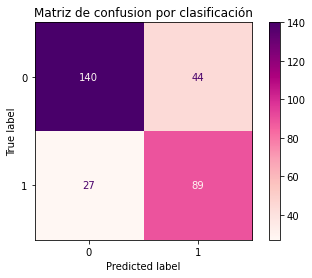

In [50]:
"""Generación de la matriz de confusión (gráfica)"""
matrix = plot_confusion_matrix(clf, X_TEST, Y_TEST,
                                 cmap=plt.cm.RdPu)
plt.title('Matriz de confusion por clasificación')
plt.show(matrix)
plt.show()